Ben Steves, CS344, Spring 2022, 1-14-21

# Lab 1: Warmup

## Environment check

Run the following cell to check that your environment is set up properly.

In [1]:
from fastbook import *
pip_path = !which pip
assert 'conda' in pip_path[0], "pip path should include conda"

On the lab computers, this should display `True`:

In [2]:
torch.cuda.is_available()

True

Anyone running locally on macOS CPU will need this code; generally you should be using the lab machines though:

In [ ]:
import sys
if sys.platform == "darwin":
    # https://stackoverflow.com/a/64855500/69707
    import os
    os.environ['OMP_NUM_THREADS'] = '1'

## Jupyter Notebooks

Add your code and Markdown cells here. Delete this cell.

In [3]:
1+1

2

Here is some Markdown formatting:
- This is **bold**
- This *is* italic
- This is a [link to Calvin's website](https://calvin.edu/)

In [4]:
x = 1.0
x * 2
print("Something")
x = x * 2
x * 2

Something


4.0

The printed statement gets shown along with the output of the last used instance of x

## Basic Image Classifier

In [5]:
from fastai.vision.all import *

In [6]:
path = untar_data(URLs.PETS)/'images'

In [7]:
def is_cat(x):
    return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files_sorted(path),
    valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(224))

In [8]:
learn = cnn_learner(
    dls=dls,
    arch=resnet34,
    metrics=error_rate)
learn.fine_tune(epochs=1)

epoch,train_loss,valid_loss,error_rate,time
0,0.166130,0.016332,0.006089,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.054310,0.011663,0.004060,00:26


*optional*: uploader widget to try out your own image

In [ ]:
from ipywidgets import widgets
uploader = widgets.FileUpload()
uploader

In [ ]:
if len(uploader.data) > 0:
    img = PILImage.create(uploader.data[0])
    is_cat, _, probs = learn.predict(img)
    print(f"Is this a cat?: {is_cat}.")
    print(f"Probability it's a cat: {probs[1].item():.6f}")

1. Path's value is output below. After looking in the folder the images reside in, we see that:
- Cats have upper-case first letters (which from the readings is used in the function is_cat)
- All animals are organized in alphabetical order
- All species are grouped together with an image number. All images follow the syntax: species_imagenumber

In [9]:
path

Path('/scratch/cs344/data/oxford-iiit-pet/images')

2. As shown below, the first image shown is the Abyssinian cat, image 1. "Images" is a list of all of the pictures used for the data, but sorted, more than likely in the same way that we see them in the file folder (alphabetical order and numerical order)

In [10]:
images = get_image_files_sorted(path)
first_img = images[0]
first_img

Path('/scratch/cs344/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

3. is_cat returns true if an image is a cat, which it checks by seeing if the first letter of the file name is uppercase.

In [11]:
is_cat(first_img.name)

True

4. This grabs a sample of the image data and prints whether or not they are dog or a cat. "False" is printed if the image is a dog, and true if a cat.

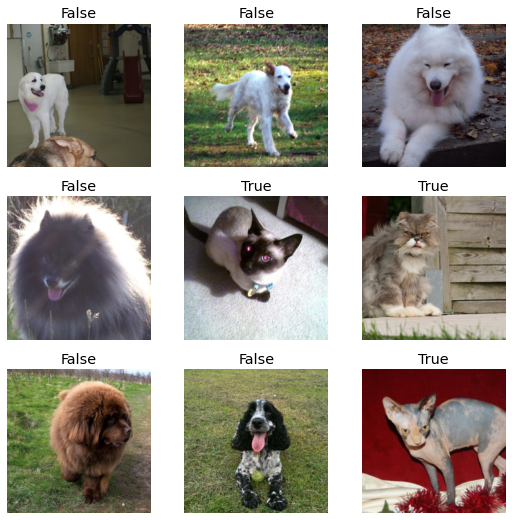

In [13]:
dls.train.show_batch()

## PyTorch

### Dot products

Recall that we can make a line by an expression like `y = w*x + b`. (Some of you may remember *mx+b* , but we'll use *w* for the *weight(s)* instead.)

That's a multiplication followed by a sum. We can extend that to lots of *x*'s, each of which needs a corresponding *w*:

`y = w1*x1 + w2*x2 + ... + wN*xN + b`

For simplicity, let's start by ignoring the `b`ias.  So we're left with

`y = w1*x1 + w2*x2 + ... + wN*xN`

that is, multiply each number in `w` by its corresponding number in `x` and add up the results: `sum(w[i] * x[i] for i in range(N))`.

The result is called a *dot product*, and is one of the fundamental operations in linear algebra. At this point you don't need to understand all the linear algebra part of this, we're just implementing a common calculation.

Let's do that in Python, and then Torch. To start, let's make a `w`eights and an `x`.

In [14]:
w = tensor([-2.0, 1.0])
w

tensor([-2.,  1.])

In [15]:
x = tensor([1.5, 2.0])
x

tensor([1.5000, 2.0000])

The shapes of `w` and `x` must match.

In [16]:
N = len(w)
assert N == len(x)

#### `for` loop approach

In [18]:
def dot_loop(w, x):
    return sum(w[i] * x[i] for i in range(len(w)))
dot_loop(w, x)

tensor(-1.)

#### Torch Elementwise Operations

In [19]:
w*x

tensor([-3.,  2.])

In [20]:
w.sum()

tensor(-1.)

In [21]:
def dot_ops(w, x):
    return torch.sum(w*x)
dot_ops(w, x)

tensor(-1.)

In [22]:
torch.dot(w,x)

tensor(-1.)

## Linear layer

In [25]:
def linear(weights, bias, x):
    return torch.dot(weights,x) + bias
linear(w, 1.0, x)

tensor(0.)

### Linear layer, Module-style

In [26]:
class Linear:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def forward(self, x):
        return torch.dot(self.weights, x) + self.bias

layer = Linear(weights=w, bias=1.0)
layer.forward(x)

tensor(0.)

(for own sake, making note that the initialization of weights and bias means they dont need to be passed as parameters to the forward function)

## Mean Squared Error

In [27]:
y_true = tensor([3.14, 1.59, 2.65])
y_pred = tensor([2.71, 8.28, 1.83])

resid = y_true - y_pred
squared_error = resid**2
torch.mean(squared_error)

tensor(15.2045)

In [29]:
torch.mean((y_true-y_pred)**2)

tensor(15.2045)